 Mount the drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Move dataset to local

In [2]:
import shutil

nava_drive_dir = '/content/drive/MyDrive/NavaDataset'
nava_dir = '/content/nava'

shutil.copytree(nava_drive_dir, nava_dir)

'/content/nava'

Print the number of samples

In [3]:
import glob
print("Number of Samples: ", len(glob.glob('/content/nava/Data/*.mp3')))

Number of Samples:  1785


Make a train dataset

In [4]:
import os
import pandas as pd

with open('/content/nava/train_40.txt', 'r') as file:
    lines = file.readlines()

data = []
err = 0
for line in lines:
    parts = line.strip().split('_')
    file_name = f'/content/nava/Data/{line.strip()}.mp3'
    instrument = int(parts[0])
    dastgah = int(parts[1])
    artist = int(parts[2])

    # Exclude if the file doesnt exist
    if os.path.exists(file_name):
        data.append([file_name, instrument, dastgah, artist])
    else:
        err+=1

print(f"Warning: {err} files not found.")

columns = ['relative_path', 'instrument', 'dastgah', 'artist']
train = pd.DataFrame(data, columns=columns)

Make validation dataset

In [5]:
with open('/content/nava/dev.txt', 'r') as file:
    lines = file.readlines()

data = []
err = 0
for line in lines:
    parts = line.strip().split('_')
    file_name = f'/content/nava/Data/{line.strip()}.mp3'
    instrument = int(parts[0])
    dastgah = int(parts[1])
    artist = int(parts[2])

    # Exclude if the file doesnt exist
    if os.path.exists(file_name):
        data.append([file_name, instrument, dastgah, artist])
    else:
        err+=1

print(f"Warning: {err} files not found.")

columns = ['relative_path', 'instrument', 'dastgah', 'artist']
validation = pd.DataFrame(data, columns=columns)

Make a test dataset

In [6]:
with open('/content/nava/test.txt', 'r') as file:
    lines = file.readlines()

data = []
err = 0
for line in lines:
    parts = line.strip().split('_')
    file_name = f'/content/nava/Data/{line.strip()}.mp3'
    instrument = int(parts[0])
    dastgah = int(parts[1])
    artist = int(parts[2])

    # Exclude if the file doesnt exist
    if os.path.exists(file_name):
        data.append([file_name, instrument, dastgah, artist])
    else:
        err+=1

print(f"Warning: {err} files not found.")

columns = ['relative_path', 'instrument', 'dastgah', 'artist']
test = pd.DataFrame(data, columns=columns)

Print the head of the train dataset

In [7]:
train.head()

,relative_path,instrument,dastgah,artist
0,/content/nava/Data/1_0_08_09.mp3,1,0,8
1,/content/nava/Data/1_0_08_11.mp3,1,0,8
2,/content/nava/Data/1_0_08_07.mp3,1,0,8
3,/content/nava/Data/1_0_08_12.mp3,1,0,8
4,/content/nava/Data/1_0_08_06.mp3,1,0,8


Plot the distribution for each class ID in the train set

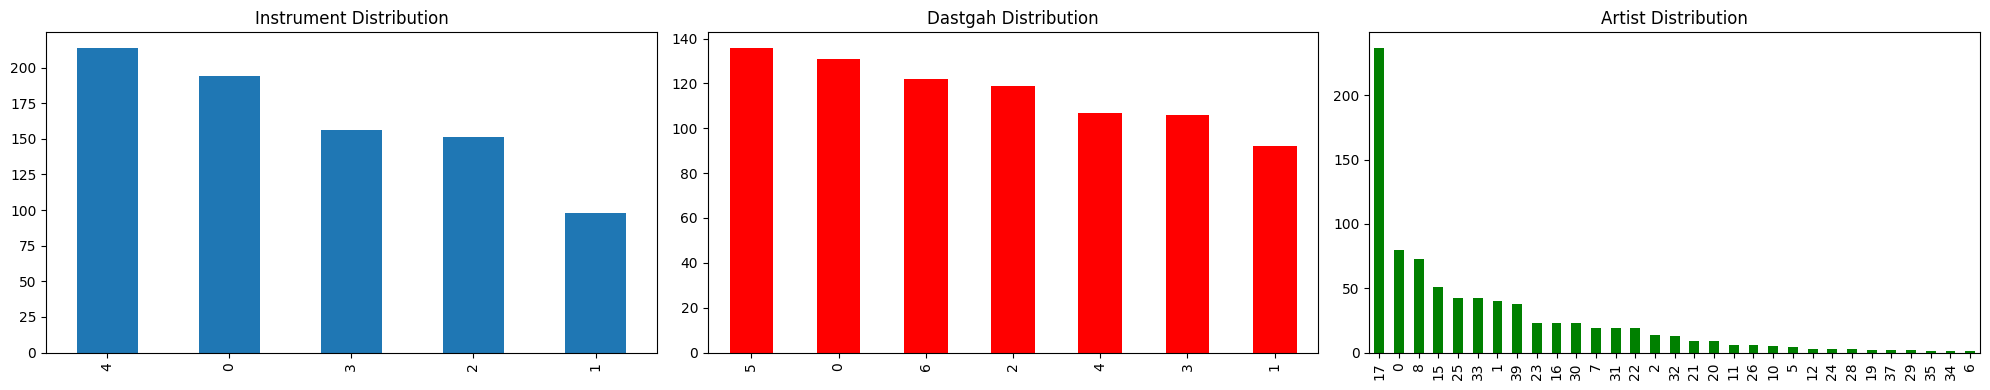

In [8]:
import matplotlib.pyplot as plt

instrument_counts = train['instrument'].value_counts()
dastgah_counts = train['dastgah'].value_counts()
artist_counts = train['artist'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

instrument_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Instrument Distribution')

dastgah_counts.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Dastgah Distribution')

artist_counts.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Artist Distribution')

plt.tight_layout()
plt.show()

Plot the distribution for each class ID in the valisation set

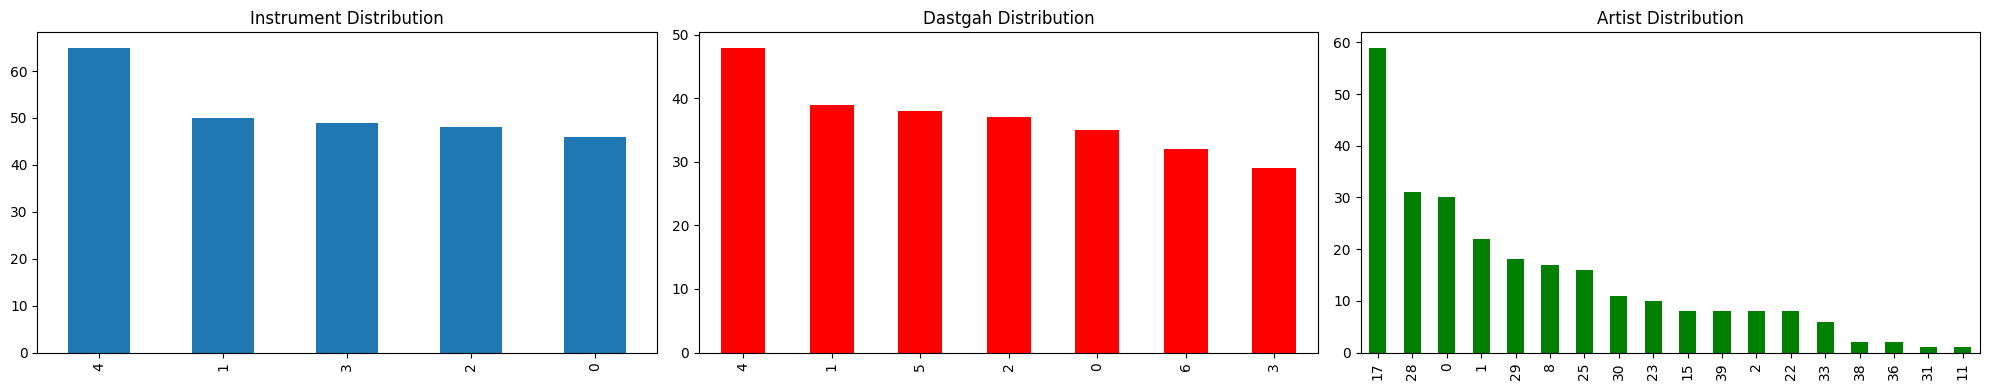

In [9]:
instrument_counts = validation['instrument'].value_counts()
dastgah_counts = validation['dastgah'].value_counts()
artist_counts = validation['artist'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

instrument_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Instrument Distribution')

dastgah_counts.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Dastgah Distribution')

artist_counts.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Artist Distribution')

plt.tight_layout()
plt.show()

Plot the distribution for each class ID in the test set

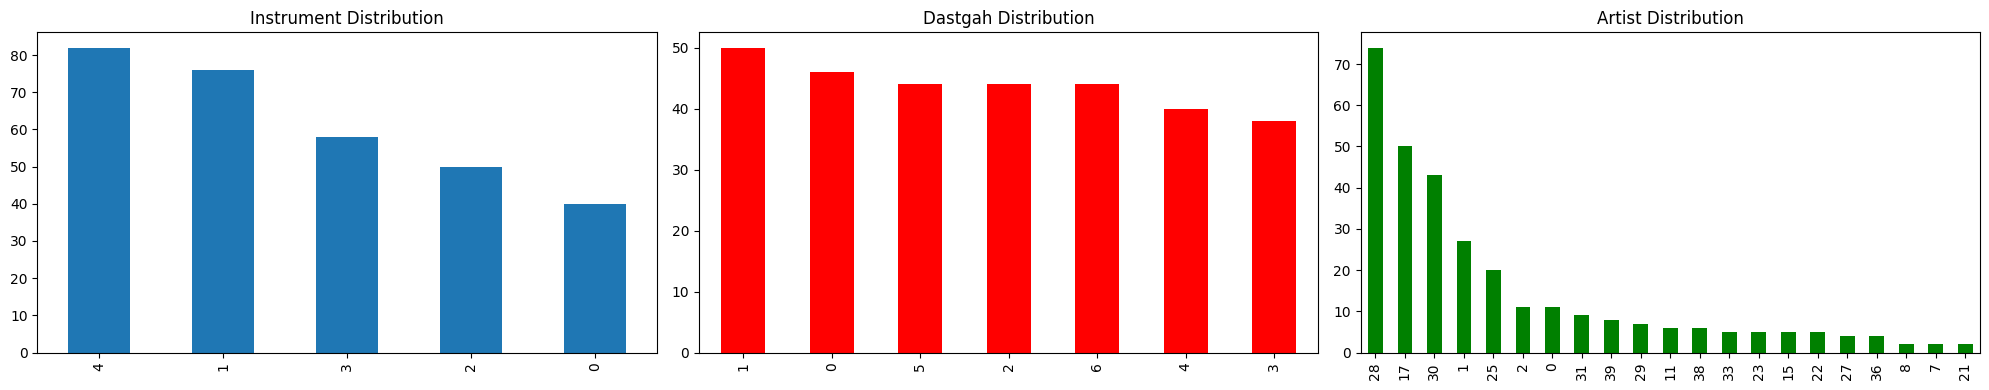

In [10]:
instrument_counts = test['instrument'].value_counts()
dastgah_counts = test['dastgah'].value_counts()
artist_counts = test['artist'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

instrument_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Instrument Distribution')

dastgah_counts.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Dastgah Distribution')

artist_counts.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Artist Distribution')

plt.tight_layout()
plt.show()

Show one file

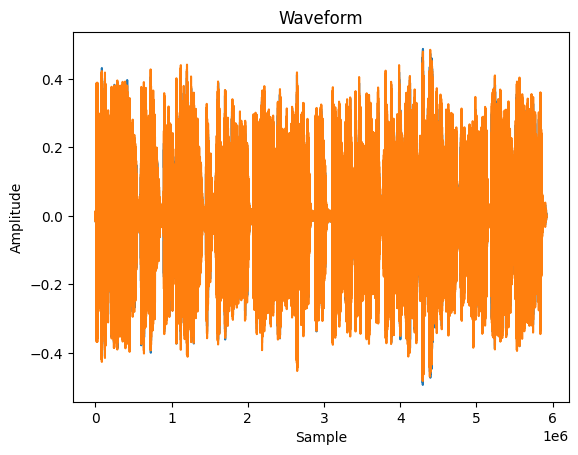

In [11]:
import torchaudio


waveform, sample_rate = torchaudio.load(train['relative_path'][5])

plt.plot(waveform.T.numpy())
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Show the MFCC for that file

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


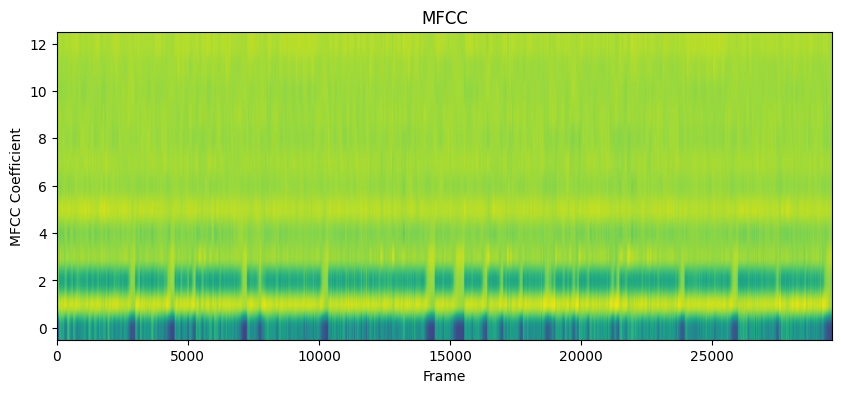

In [12]:
import torchaudio.transforms as T

mfcc_transform = T.MFCC(sample_rate=sample_rate, n_mfcc=13)
mfcc = mfcc_transform(waveform)

plt.figure(figsize=(10, 4))
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', aspect='auto', origin='lower')
plt.title('MFCC')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.show()

Deine a class to read audio, resample and adjust the length for training

In [ ]:
import math, random
import torch
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():

  @staticmethod
  def open(audio_file, newsr, max_ms):
    sig, sr = torchaudio.load(audio_file)

    # Convert to mono channel
    resign = torch.mean(sig, dim=0)

    # Resample with the new sample rate
    if (sr != newsr):
        resig = torchaudio.transforms.Resample(sr, newsr)(resign)

    # Truncate to the indicated lenght (max_ms) if needed
    sig_len = resig.shape.numel()
    max_len = newsr//1000 * max_ms

    resigs = []

    # Segment the signals into max_len parts
    if (sig_len > max_len):
      num_segments = sig_len // max_len
      for i in range(num_segments):
            # Truncate the signal to the given length
            start = i * max_len
            end = (i + 1) * max_len
            segment_resig = resig[start:end]
            resigs.append(segment_resig.numpy())

    # This section would not be activated at all; however, we add that for the matter of completeness
    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((1, pad_begin_len))
      pad_end = torch.zeros((1, pad_end_len))

      resigs.append(torch.cat((pad_begin, resig, pad_end), 1).numpy())

    return resigs

Define the dataset for loading audio and extracting its MERT representation

In [ ]:
from torch.utils.data import DataLoader, Dataset
from transformers import Wav2Vec2FeatureExtractor
from transformers import AutoModel
from torch import nn



# Sound Dataset
class SoundDS(Dataset):
    def __init__(self, df):
        self.df = df
        self.duration = 5000 #5s
        self.sr = 24000
        self.channel = 1
        self.shift_pct = 0.4

        # Load model weights
        self.model = AutoModel.from_pretrained("m-a-p/MERT-v1-95M", trust_remote_code=True)

        # Load the corresponding preprocessor config
        self.processor = Wav2Vec2FeatureExtractor.from_pretrained("m-a-p/MERT-v1-95M",trust_remote_code=True)
        self.resample_rate = self.processor.sampling_rate

    def __len__(self):
          return len(self.df)

    # Get i'th item in dataset
    def __getitem__(self, idx, batch_size = 2, tag = ['instrument', 'dastgah', 'artist']):
        class_id = self.df.loc[idx, tag]
        aud = AudioUtil.open(self.df.loc[idx, 'relative_path'], self.sr, self.duration)

        # Devide into batch_size patches
        aud_length = len(aud)
        patches = []
        for i in range(0, aud_length, batch_size):  # Create patches with specified size
            patch = aud[i:min(i + batch_size, aud_length)]
            patches.append(patch)

        representations = []
        for patch in patches:
            inputs = self.processor(patch, sampling_rate=self.resample_rate, return_tensors="pt", padding=True)
            with torch.no_grad():
                outputs = self.model(**inputs, output_hidden_states=True)
            representation = torch.stack(outputs.hidden_states).transpose(0, 1).mean(-2)
            representations.append(representation)

        item_representation = torch.cat(representations, dim=0)
        class_ids = torch.tensor(class_id).unsqueeze(1).repeat(1, aud_length)
        return item_representation, class_ids


In [ ]:
train_ds = SoundDS(train)
test_ds = SoundDS(test)
val_ds = SoundDS(validation)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=16, shuffle=False)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

configuration_MERT.py:   0%|          | 0.00/5.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/m-a-p/MERT-v1-95M:
- configuration_MERT.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_MERT.py:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/m-a-p/MERT-v1-95M:
- modeling_MERT.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at m-a-p/MERT-v1-95M were not used when initializing MERTModel: ['encoder.pos_conv_embed.conv.weight_v', 'encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing MERTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MERTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of MERTModel were not initialized from the model checkpoint at m-a-p/MERT-v1-95M and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

Some weights of the model checkpoint at m-a-p/MERT-v1-95M were not used when initializing MERTModel: ['encoder.pos_conv_embed.conv.weight_v', 'encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing MERTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MERTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of MERTModel were not initialized from the model checkpoint at m-a-p/MERT-v1-95M and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
So

As feature extraction on-fly is time-allocating, we extract features for all data points and pickle the data to reduce the training overhead.

In [ ]:
import pickle
import numpy as np

def pickle_features(data_ds, save_path):
    features_list = []
    instrument_list = []
    dastgah_list = []
    artist_list = []

    for i in range(len('22w')):
        print(i)
        # Extract the representation
        features, classid = data_ds[i]

        features_list +=  [array for array in features.numpy()]
        instrument_list += classid[0].tolist()
        dastgah_list += classid[0].tolist()
        artist_list += classid[0].tolist()

    # Create a dictionary to store data
    data = {'features': np.array(features_list), 'instrument': np.array(instrument_list), 'dastgah': np.array(dastgah_list), 'artist': np.array(artist_list)}
    # Save the dictionary to a pickle file
    with open(save_path, 'wb') as file:
        pickle.dump(data, file)

    return data


Extract and save training and test features and upload it to the drive




In [ ]:
pickle_features(train_ds, './train_ds.pkl')
pickle_features(test_ds, './test_ds.pkl')
pickle_features(val_ds, './val_ds.pkl')

In [ ]:
shutil.copy('train_ds.pkl', '/content/drive/MyDrive/')
shutil.copy('test_ds.pkl', '/content/drive/MyDrive/')

In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/mertrepresentations0/test1_ds.pkl', 'test_ds.pkl')
shutil.copy('/content/drive/MyDrive/mertrepresentations0/val1_ds.pkl', 'val_ds.pkl')
shutil.copy('/content/drive/MyDrive/mertrepresentations0/train1_ds.pkl', 'train_ds.pkl')

'train_ds.pkl'

Now we define two dataloaders:


1.   Eager Dataloader: load all the data to the storage; this approach works only for small datasets
2.   Lazy Dataloader: load the data on fly to reduce the storage use



In [ ]:
import numpy as np

class EagerLoader(Dataset):
    def __init__(self, file_path):
        self.file_path = file_path

        # Load all the pickled data
        with open(file_path, 'rb') as file:
            data = pickle.load(file)

        features_array = np.array(data['features'], dtype=np.float32)
        self.features = torch.tensor(features_array)
        self.instrument = torch.tensor(data['instrument'], dtype=torch.long)
        self.dastgah = torch.tensor(data['dastgah'], dtype=torch.long)
        self.artist = torch.tensor(data['artist'], dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        sample = {'features': self.features[idx], 'instrument': self.instrument[idx], 'dastgah': self.dastgah[idx], 'artist': self.artist[idx]}
        return sample


In [ ]:
class LazyLoader(Dataset):
    def __init__(self, file_path):
        self.file_path = file_path

        # Open the pickled file but do not load it
        # Read metadata
        self.metadata = pickle.load(self.file_path)
        self.num_samples = len(self.metadata['features'])

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):

        # Load only the required portion of the data
        self.file_path.seek(self.metadata['offsets'][idx])
        data = pickle.load(self.file_path)

        sample = {
            'features': torch.tensor(data['features'], dtype=torch.float32),
            'instrument': torch.tensor(data['instrument'], dtype=torch.long),
            'dastgah': torch.tensor(data['dastgah'], dtype=torch.long)
        }

        return sample

We use the eager dataloader as the dataset consist of less than 100 hours of music.

In [ ]:
train_ds = EagerLoader('./train_ds.pkl')
val_ds = EagerLoader('./val_ds.pkl')
test_ds = EagerLoader('./test_ds.pkl')

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=64, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=False)

<ipython-input-12-2dd2b47b9076>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.instrument = torch.tensor(data['instrument'], dtype=torch.long)
<ipython-input-12-2dd2b47b9076>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dastgah = torch.tensor(data['dastgah'], dtype=torch.long)
<ipython-input-12-2dd2b47b9076>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.artist = torch.tensor(data['artist'], dtype=torch.long)


In [ ]:
data_iter = iter(train_dl)

# Get a single batch
try:
    batch_data = next(data_iter)
except StopIteration:
    data_iter = iter(train_dl)
    batch_data = next(data_iter)

Define different FC networks for the fine-tunning phase

In [ ]:
class FineTuningLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FineTuningLayer, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
    def forward(self, x):
        x = self.fc(x)
        return x


In [ ]:
class FineTuningLayer2(nn.Module):
    def __init__(self, input_size, output_size):
        super(FineTuningLayer2, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size//4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(input_size//4, output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
class FineTuningLayer3(nn.Module):
    def __init__(self, input_size, output_size):
        super(FineTuningLayer3, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size//2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(input_size//2, input_size//4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(input_size//4, output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu1(x)
        x = self.fc3(x)
        return x

Defining the training function

In [ ]:
from torch import optim

def train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate, training_config, device='cuda'):

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Move model to device
    #model.to(device)

    # Lists to store training history
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):

        # Training
        model.train()
        total_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:

            representations, labels = data['features'][:, training_config['representation'], :], data[training_config['class']]

            optimizer.zero_grad()
            outputs = model(representations)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Testing validation
        model.eval()
        total_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for data in val_loader:

                representations, labels = data['features'][:, training_config['representation'], :], data[training_config['class']]
                print(labels)
                outputs = model(representations)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = outputs.max(1)
                total_val += labels.size(0)
                correct_val += predicted.eq(labels).sum().item()

            avg_val_loss = total_val_loss / len(val_loader)
            val_accuracy = correct_val / total_val

        # Print and save training history
        print(f'Epoch {epoch + 1}/{num_epochs} => '
              f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Acc: {val_accuracy:.4f}')

        train_loss_history.append(avg_train_loss)
        train_acc_history.append(train_accuracy)
        val_loss_history.append(avg_val_loss)
        val_acc_history.append(val_accuracy)


    # Testing validation
    model.eval()
    total_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_loader:

            representations, labels = data['features'][:, training_config['representation'], :], data[training_config['class']]
            print(labels)
            outputs = model(representations)
            loss = criterion(outputs, labels)

            total_test_loss += loss.item()
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

        avg_test_loss = total_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test

    print(f'Test Acc: {test_accuracy:.4f}')

    # Return the history
    history = {
        'train_loss': train_loss_history,
        'train_acc': train_acc_history,
        'val_loss': val_loss_history,
        'val_acc': val_acc_history,
        'test_acc': test_accuracy

    }

    return history

An exapmle train scenario

In [ ]:
input_size = 768
output_size = 7
model = FineTuningLayer(input_size, output_size)

train(model, train_dl, val_dl, test_dl, num_epochs=300, training_config={'representation':3, 'class':'dastgah'},learning_rate=0.001)